# ~ ~ ~ Spectral Diagnostics using FISS data ~ ~ ~ 

#### In this notebook we look at the intensity and dynamics of two classic chromospheric lines: Halpha and CaII 8542, as observed by the FISS rastering spectrograph installed at the 1.6 m Goode Solar Telescope (BBSO). 

#### These two lines are the most used, by far, becase of several characteristics : easier to observe (in the red part of the spectrum); sensitive to magnetic field (CaII); abundant literature to compare with - even if different resolutions (spatial, spectral, temporal) will sometimes cause confusion!


In [1]:
# We will import some basic packages:

from astropy.io import fits
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# First we will open the most dramatic spectral line, H alpha

# Data is in the "FISS_spectroscopy" folder of the data distribution. Use whatever path you have on your local disk
#data_dir = '/Path/to/data/directory/data/Velocity_IBIS/'

data_dir = '/Users/gcauzzi/Level2/WFA_June2021_workshop/data/Velocity_FISS/'


cube_halpha = fits.open(data_dir+'Halpha.FISS.20170614_170511.quiet.fits')[0].data
cube_halpha.shape


(150, 256, 512)

In [3]:
# We have 512 wavelenght points, at 150 x 256 pixels! (Each pixel is 0.16 arcsec, so something like ~ 100 km)
# 256 pixels along the slit, and 150 raster steps

Text(0.5, 1.0, 'Continuum')

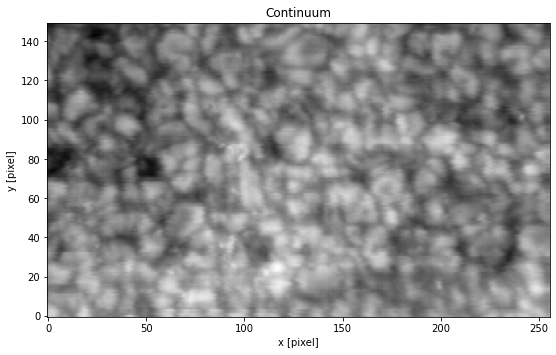

In [3]:
# Let's plot one wavelength to see if this makes sense. Image is basically spatial distribution of 
# the intensity at a fixed wavelength. Typically we choose 0-th wavelength as it most commonly corresponds
# to the continuum
plt.figure(figsize=[9,9])
plt.imshow(cube_halpha[:,:,0],cmap='gray',origin='lower')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
plt.title("Continuum")

#### So, the first image of the cube looks indeed like a continuum - we see mostly granulation and, maybe, some small magnetic elements. If you look carefully, you can see small jumps in the vertcial direction: each row corresponds to a different raster step (hence, a different time, i.e. different seeing conditions).

Now, we will calculate to spatially averaged spectrum to see what are we dealing with here. It is good to see how our spectral line looks like. To plot that in  meaningful way we will also need wavelengths. They are in the same directory:

In [4]:
#as above, write the proper path

ll_halpha = fits.open(data_dir+'wavha.fiss.20170614.fits')[0].data
ll_halpha.shape

(512,)

512 wavelengthts for 512 wavelength points, looks good so far!

In [5]:
# Let's normalize the cube by dividing with the mean continuum intensity over the image
cube_halpha /= np.mean(cube_halpha[:,:,0]) 

In [6]:
# And calculate the mean spectrum:
mean_spectrum_ha = np.mean(cube_halpha,axis=(0,1))

Text(0.5, 1.0, 'Spatially averaged spectrum')

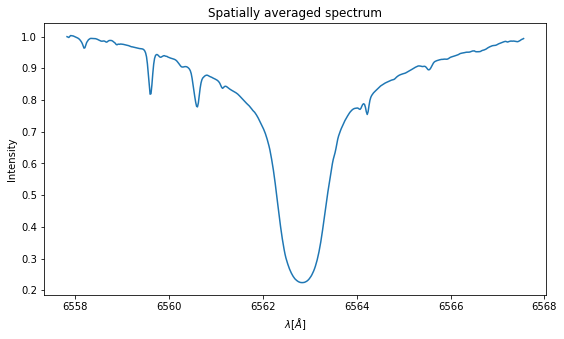

In [7]:
plt.figure(figsize=[9,5])
plt.plot(ll_halpha,mean_spectrum_ha)
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")

Looks like H$\alpha$ indeed! Discuss a little bit the line shape here. Also the wing extension, there is not a lot of continuum here! (but certainly better than what you get from FPI-based instruments) 


#### Now, let's scan through the line. To make it easier,  we first plot the spectrum with indices as x-axis to better see which index belongs to continuum, wing, linecore, etc...

Text(0.5, 1.0, 'Spatially averaged spectrum')

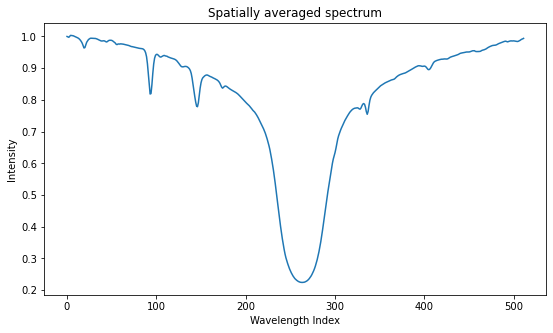

In [8]:
plt.figure(figsize=[9,5])
plt.plot(mean_spectrum_ha) # note that we don't use the wavelength info here 
plt.xlabel("Wavelength Index")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")

Text(0.5, 1.0, 'Wavelength of your choice')

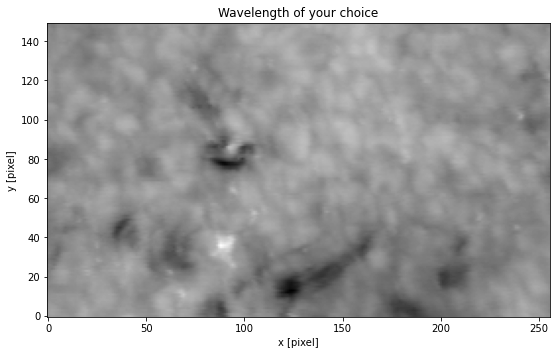

In [9]:
# Let's plot the image, wavelength by wavelength. Choose interesting indices from the plot above: 
# you can try to figure out where 'chromospheric" features start to appear

plt.figure(figsize=[9,9])
plt.imshow(cube_halpha[:,:,310],cmap='gray',origin='lower')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
plt.title("Wavelength of your choice")

### The chromospheric portion of the H$\alpha$ line is less than 100 wavelengths points (i.e., about 1.9 Ang total) out of the whole profile. This has important consequences when using broad band filters (cf. lecture on Day 4).

#### To summarize this part, let's plot a 4-panel with image of the solar surface at few different wavelengths:

Text(0.5, 1.0, 'Wavelength = 0.0339843749998181')

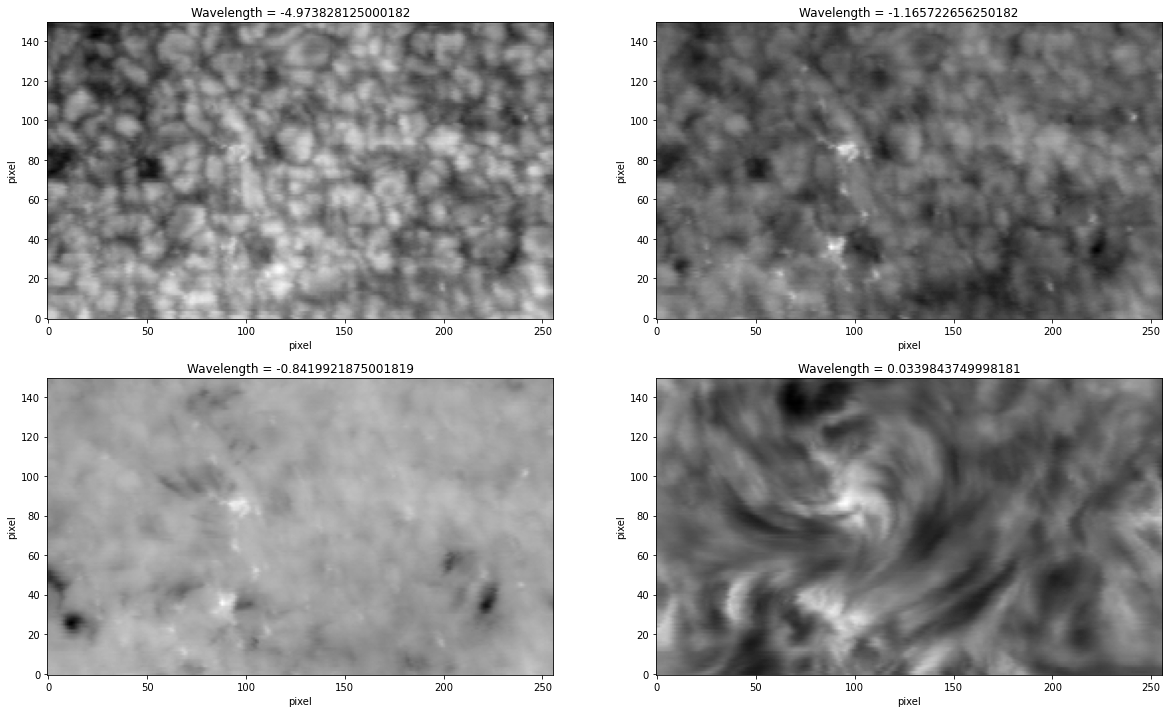

In [10]:
# Let's plot multiple wavelengths now:
indices = [0,200,217,263]

plt.figure(figsize=[20,12])
plt.subplot(221)
plt.imshow(cube_halpha[:,:,indices[0]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[0]]-6562.8))
plt.subplot(222)
plt.imshow(cube_halpha[:,:,indices[1]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[1]]-6562.8))
plt.subplot(223)
plt.imshow(cube_halpha[:,:,indices[2]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[2]]-6562.8))
plt.subplot(224)
plt.imshow(cube_halpha[:,:,indices[3]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[3]]-6562.8))

#### An important characteristics of H$\alpha$ is that it completely lacks opacity in the high photosphere. Indeed, you never observe reverse granulation in the wings: there is a  "jump" from the granular pattern to the typical chromospheric fibrilar structures. This is different than CaII lines. So...

### Let's repeat the same exercise for CaII 8542

In [11]:
#As above, but for the CaII files now
cube_ca = fits.open(data_dir+'CaII.FISS.20170614_170511.quiet.fits')[0].data
cube_ca /= np.mean(cube_ca[:,:,5]) # why did we choose point 5 here? It will become clear soon
mean_ca = np.mean(cube_ca,axis=(0,1))

ll_ca = fits.open(data_dir+'wavca.fiss.20170614.fits')[0].data
mean_spectrum_ca = np.mean(cube_ca,axis=(0,1))

cube_ca.shape

(150, 250, 502)

Very similar shape of the image, and similar number of wavelengths too! As the lines are observed simultaneously, the number of raster steps must be equal (150). The number of pixels along the slit is slightly lower (250 vs 256), but the spatial scale is the same. Spectral sampling is ~ 25 mA.

Text(0.5, 1.0, 'Continuum')

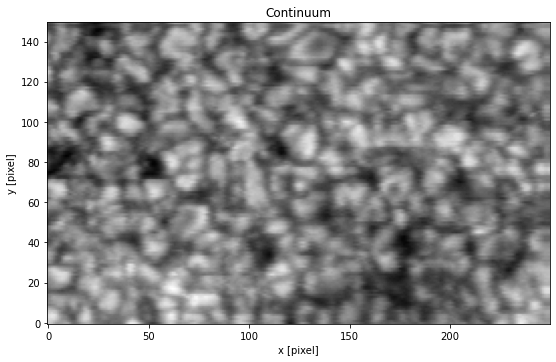

In [12]:
# Let's plot look at the continuum (Note we use the index=5 because the first spectra pixels have a problem)

plt.figure(figsize=[9,9])
#plt.figure(figsize=[20,9])
#plt.subplot(121)
plt.imshow(cube_ca[:,:,5],cmap='gray',origin='lower')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
plt.title("Continuum")

#plt.subplot(122)
#plt.imshow(cube_halpha[:,:,0],cmap='gray',origin='lower')
#plt.xlabel("x [pixel]")
#plt.ylabel("y [pixel]")
#plt.title("Continuum near Halpha") #some calibrations issues

In [13]:
# Let's normalize the cube by dividing with the mean continuum intensity over the image
cube_ca /= np.mean(cube_ca[:,:,5]) 

# And calculate the mean spectrum:
mean_spectrum_ca = np.mean(cube_ca,axis=(0,1))

Text(0.5, 1.0, 'Spatially averaged spectrum')

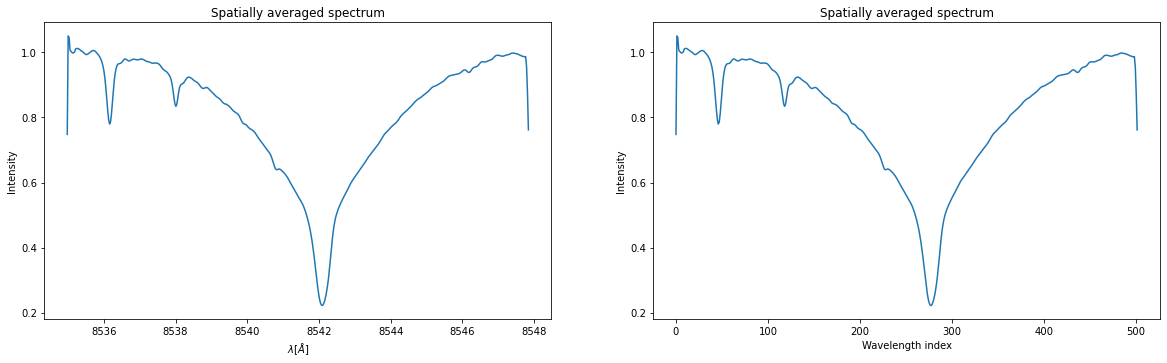

In [14]:
# Like before, let's plot the average profile both with the proper waav. scale, and wavelength index number
plt.figure(figsize=[20,12])
plt.subplot(221)
plt.plot(ll_ca,mean_spectrum_ca)
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")
plt.subplot(222)
plt.plot(mean_spectrum_ca)
plt.xlabel("Wavelength index")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")

A rather different shape!  As per the wing extension, there is even less continuum than for Halpha

Text(0.5, 1.0, 'Wavelength of your choice')

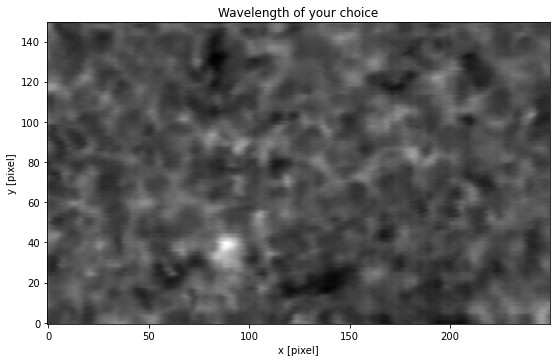

In [15]:
# Same exercise, let's plot the image, wavelength by wavelength. Again,
# you can try to figure out where 'chromospheric" features start to appear

plt.figure(figsize=[9,9])
plt.imshow(cube_ca[:,:,293],cmap='gray',origin='lower')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
plt.title("Wavelength of your choice")

### The chromospheric portion of the CaII line is less than 35 wavelengths points (i.e., less than 1 Angstrom). Spectral resolution is quite important to observe this line.

#### Again, to summarize this part, let's plot a 4-panel with image of the solar surface at few different wavelengths:

Text(0.5, 1.0, 'Wavelength = 0.0008203124998544808')

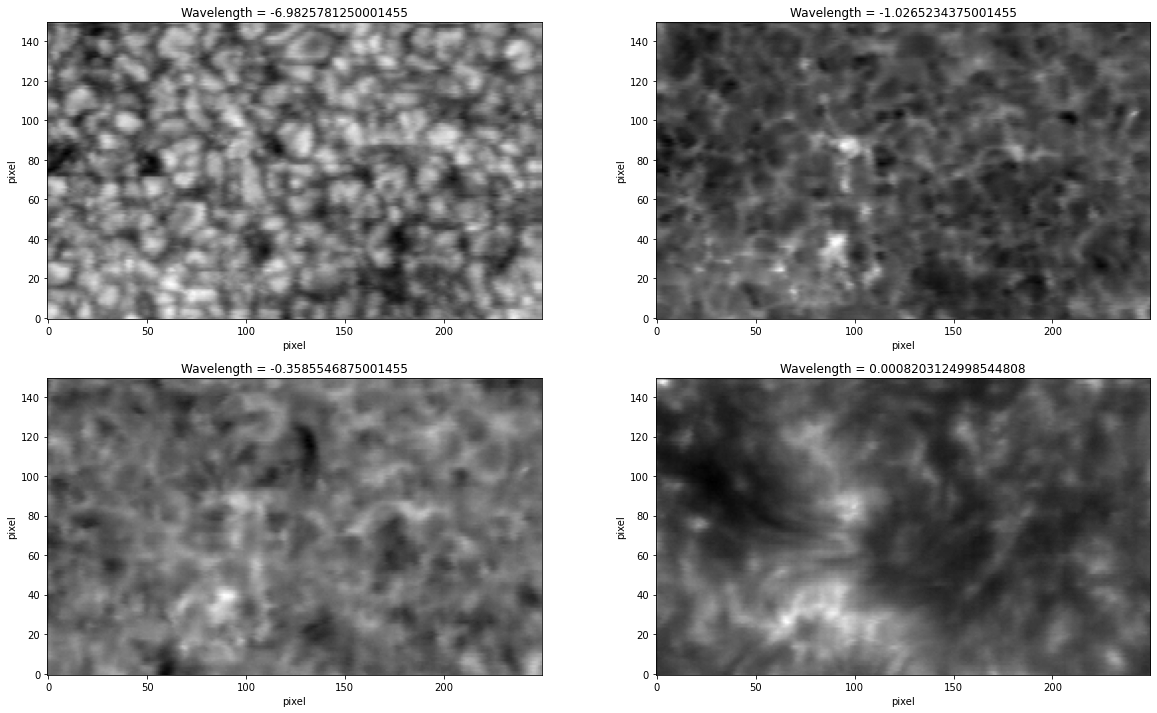

In [16]:
# Let's plot multiple wavelengths now:
indices = [5,237,263,277]

plt.figure(figsize=[20,12])
plt.subplot(221)
plt.imshow(cube_ca[:,:,indices[0]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_ca[indices[0]]-8542.09))
plt.subplot(222)
plt.imshow(cube_ca[:,:,indices[1]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_ca[indices[1]]-8542.09))
plt.subplot(223)
plt.imshow(cube_ca[:,:,indices[2]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_ca[indices[2]]-8542.09))
plt.subplot(224)
plt.imshow(cube_ca[:,:,indices[3]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_ca[indices[3]]-8542.09))

#### The CaII line's wings sample the photosphere from the surface all the way to the high photosphre; for example reverse granulation is well visible at ~ 1 Angstrom from line core. Magnetic elements are very constrasted at these wavelengths. 

Now, another way of thinking about this multi-wavelength images is to say we got a spectrum for each pixel. So, let's have a look at that, we have 150 x 256 (250) pixels, so let's pick some random indices and plot these spectra

In [17]:
sample_x = np.random.choice(149,10)
sample_y = np.random.choice(249,10)
print (sample_x, sample_y)

[ 71  79  38  29 129 144 129  38   2 124] [145 241 142   8 114  76 227 159  14 226]


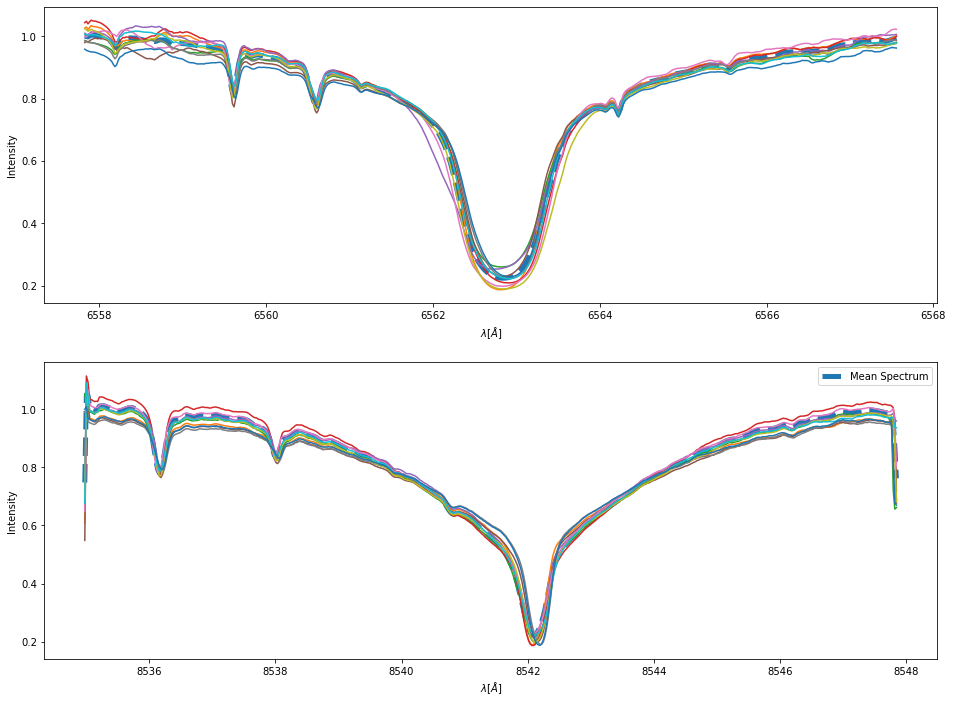

In [18]:
plt.figure(figsize=[16,12])
plt.subplot(211)
plt.plot(ll_halpha,mean_spectrum_ha,'--',linewidth=5,label='Mean Spectrum')
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
for i in range(0,10):
    plt.plot(ll_halpha,cube_halpha[sample_x[i],sample_y[i],:])
#    plt.xlim(6561.,6564.6)

plt.subplot(212)
plt.plot(ll_ca,mean_spectrum_ca,'--',linewidth=5,label='Mean Spectrum')
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
for i in range(0,10):
    plt.plot(ll_ca,cube_ca[sample_x[i],sample_y[i],:])
#    plt.xlim(8541,8543.2)
plt.legend()

### Why are the spectra different? And why are they not THAT different.
#### Think about the following: 
- Line center position
- Line asymmetry 
- "Continuum" level
- Line core level
- Line width

### Let's look at a pixel that we know is a bit "different" (magnetic element)

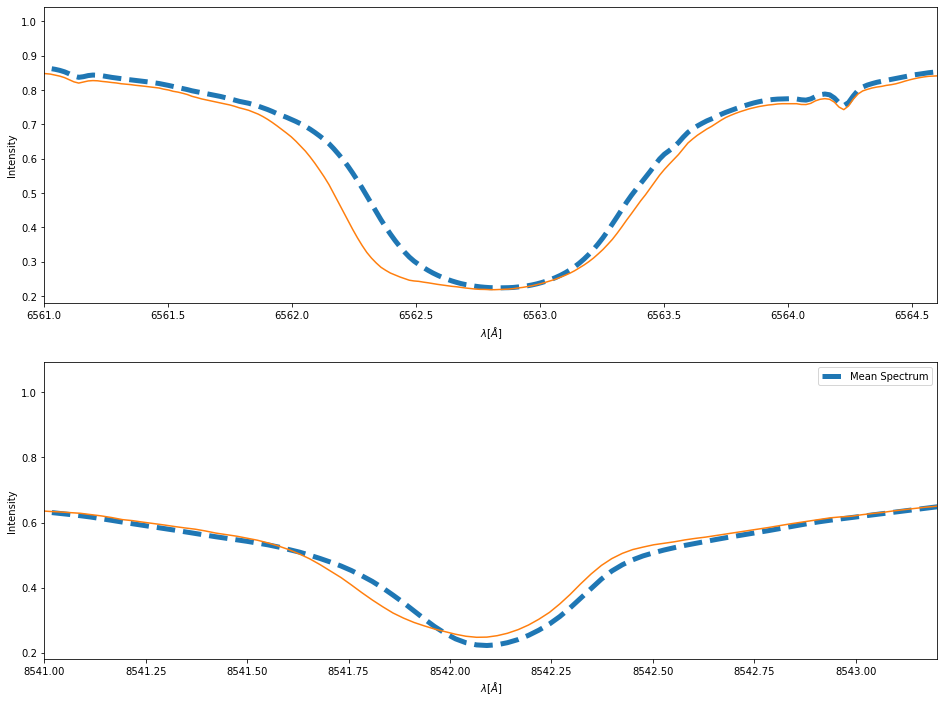

In [19]:
x=97
y=84

plt.figure(figsize=[16,12])
plt.subplot(211)
plt.plot(ll_halpha,mean_spectrum_ha,'--',linewidth=5,label='Mean Spectrum')
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
plt.plot(ll_halpha,cube_halpha[x,y,:])
plt.xlim(6561.,6564.6)

plt.subplot(212)
plt.plot(ll_ca,mean_spectrum_ca,'--',linewidth=5,label='Mean Spectrum')
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
plt.plot(ll_ca,cube_ca[x,y,:])
plt.xlim(8541,8543.2)
plt.legend()

### Let's comment, thinking e.g. at the example atmospheres we ran on Day 1


## Finding velocities as the line center position shift

If you look at the plots above, you will see that he positions of the line centers (minima) are different for each pixel. If we say that is is some representative velocity "seen" by the chromospheric lines, we can use this to infer the velocity via Doppler effect. 

#### What are some conceptual problems with this? 

.

.

.
#### Even with all these, we will get some idea of the velocity. 


So, let's use the concept from Day 1 to infer velocities for each pixel,  finding the center of the line as the minimum of the mean spectrum (we'll do only Halpha for simplicity). We will do that by fitting a parabola through 5 points around the perceived center of the line (the point if with minimum intensity). This is more precise than just picking the wavelength with minimum intensity. 

We'll start with the average profile. Data might be calibrated but it's still good to know if our line center is where we expect it to be. 

In [20]:
indmin = np.argmin(mean_spectrum_ha) #Index of the point with minimum intensity:
print (indmin) # test if that makes sense

# We will subtract the percieved mean wavelength. This is to improve numerical stability of the fit
x = ll_halpha[indmin-10:indmin+11]-np.mean(ll_halpha[indmin-10:indmin+11]) 
y = mean_spectrum_ha[indmin-10:indmin+11]

# Fit a parabola (polynomial of degree 2, through a couple of points each side of( center)
p = np.polyfit(x,y,2)
print (p)
# Location of the minimum is -b/2a where y = ax^2 + bx + c
ll0 = -p[1]/2/p[0] + np.mean(ll_halpha[indmin-10:indmin+11])
print (ll0)

263
[ 0.54428258 -0.00246011  0.22384023]
6562.83624432977


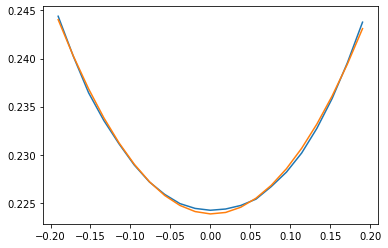

In [22]:
# If you want to be sure the fit is good, have a look here:

fit = x**2.0 * p[0] + x * p[1] + p[2]
plt.plot(x,y)
plt.plot(x,fit)

We all know by heart the magical numbers of Halpha line center: 6562.8 Angstroms, and this is very close to it. (Indeed, someone already calibrated the data). It did not have to be, and it is always good to re-center your observations to what you think is the rest wavelength. 


So now, let's define a function that does this for any spectrum:


In [23]:
def calc_line_center(spectrum, wavelength):
    indmin = np.argmin(spectrum) #Index of the point with minimum intensity:
    
    x = (wavelength - np.mean(wavelength))[indmin-10:indmin+11] 
    y = spectrum[indmin-10:indmin+11]
    # Fit a parabola (polynomial of degree 2, through a couple of points each side of center)
    p = np.polyfit(x,y,2)
    
    l_center = -p[1]/2/p[0] + np.mean(wavelength)
    return l_center

In [24]:
# Let's try on a random spectrum and see if it makes sense: 
l_center_random = calc_line_center(cube_halpha[7,6],ll_halpha)
print (l_center_random)

6562.933626350316


In [25]:
# Looks reasonable, what velocity would this be? 
c = 2.997E5 # in km/s
v_test = (l_center_random-ll0)/ll0 *c 
print (v_test)

4.447069905629287


Nice velocity! Proper way to do this would be to use it on the whole map, so that we can plot velocity maps. 

In [26]:
line_centers = np.zeros([150,256])
for i in range(0,150):
    for j in range(0,256):
        line_centers[i,j] = calc_line_center(cube_halpha[i,j],ll_halpha)

In [27]:
v_line_center = (line_centers - ll0)/ll0 * c

Text(0, 0.5, 'y [pix]')

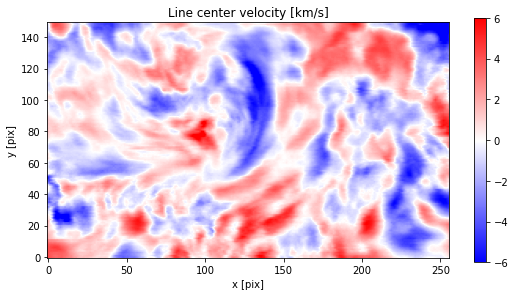

In [28]:
# And let's plot the velocity map! Exciting!
plt.figure(figsize=[9,9])
plt.imshow(v_line_center,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

### Let's plot these velocities side-by-side with the line core to see how the two correlate:

Text(0, 0.5, 'y [pix]')

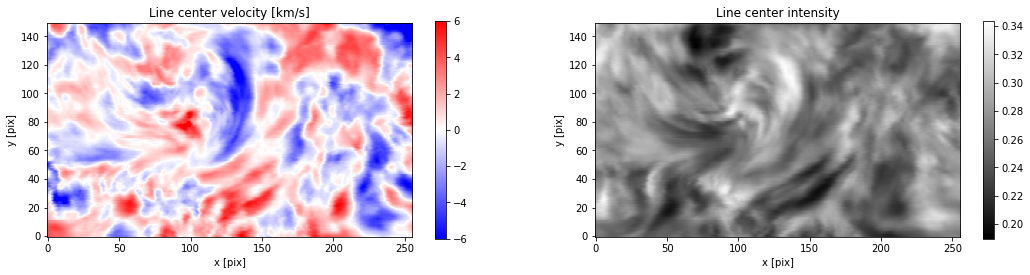

In [31]:

plt.figure(figsize=[18,8])
plt.subplot(121)
plt.imshow(v_line_center,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(122)
plt.imshow(cube_halpha[:,:,indices[3]],cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Line center intensity")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

### Let's spend some time discussing this. What do these velocities mean? How do they compare with typical photospheric velocities (patterns & amplitudes)? 

### What are the advantages and disadvantages of this approach?

After we are done with these, we can play and visualize a little bit this, but we can also move toward a more sophisticated method:

## Finding velocity via bisectors!!!!

As mentioned in Day 1 and well visualized today, the core and the wings of these lines pertain to two very different physical regimes. It makes more sense then to calculate the bisectors only within the core. Typical wavelengths interval defining the core are ~ +/- 1 Angstroms for H$\alpha$ and ~ +/- 0.5 Ang for CaII.

(one could do so also in the wings, separately; but the lines are very shallow and noise becomes an issue)

In [29]:
# Let's define a function
# The chromospheric line core might be quite independent of the photospheric wings, so we investigate only the core -
# we do so by defining the position of the "knee" of the lines (using the "offset" parameter), 
# and sampling the intensity from there to the core.



def calc_bisectors(spectrum,wavelength,levels,offset):
    
    # this is the function that takes in the spectrum, wavelength and desired bisector levels
    # and returns the position of both left & right points on the horizontal line that "cuts"
    # the profile at those levels.
    # Note: the levels are in fraction of the "Delta Intensity" between the line core and a position in the wings 
    # identified by the value "offset" = ~ 1 Ang for Halpha; 0.5 Ang for CaII

    from scipy.interpolate import interp1d
    
    line_core = calc_line_center(spectrum,wavelength)
    l_blue = line_core - offset
    l_red  = line_core + offset               # define the position of the knee, from real core position

    f = interp1d(wavelength,spectrum, kind='cubic')
    I_wingintensity_blue = f(l_blue)
    I_wingintensity_red  = f(l_red)           # find intensity at the knee

    I_wingintensity_mean = 0.5*(I_wingintensity_blue + I_wingintensity_red)
    I_coreintensity_min = f(line_core)

    wing_core_intensity_diff = I_wingintensity_mean - I_coreintensity_min   # find Delta I from core to knee

    I_level = np.zeros(len(levels))
    for jj in range (0,len(levels)):
        I_level[jj] = I_coreintensity_min + wing_core_intensity_diff * levels[jj]  # define the intensity levels

    blue_position = np.zeros(len(levels))
    red_position = np.zeros(len(levels))

    local_min = np.argmin(np.abs(wavelength-line_core))
    
    f = interp1d(spectrum[:local_min+1],wavelength[:local_min+1])
    
    for jj in range (0,len(levels)):
        blue_position[jj] = f(I_level[jj])                             # derive position in blue wing for I levels

    f = interp1d(spectrum[local_min-1:],wavelength[local_min-1:])

    for jj in range (0,len(levels)):
        red_position [jj] = f(I_level[jj])                             # derive position in red wing for I levels

    return blue_position, red_position, I_level, line_core

# Let's define a function
# This will return position of left & right. You can create both bisector and width from the results of
# this module (if your levels array contains the value=0.5). 


def calc_bisectors(spectrum,wavelength,levels,offset):
    # this is the function that takes in the spectrum, wavelength and desired bisector levels
    # and returns the position of both left & right points on the horizontal line that "cuts"
    # the profile at those levels.
    # Note: the levels are in fraction of the "Delta" between the line core and a position in the wings 
    # identified by the value "offset" = ~ 1 Ang for Halpha; 0.7 Ang for CaII
 
    

    from scipy.interpolate import interp1d


    line_core = calc_line_center(spectrum,wavelength)
    l_left = line_core - offset
    l_right = line_core + offset
    f = interp1d(wavelength,spectrum)
    I_left = f(l_left)
    I_right = f(l_right)
    
    I_mean = 0.5*(I_left+I_right)
    I_min = f(line_core)
    Delta= I_mean - I_min

    I_level = np.zeros(len(levels))
    for jj in range (0,len(levels)):
        I_level[jj] = I_min+Delta*levels[jj]

    left_position = np.zeros(len(levels))
    right_position = np.zeros(len(levels))

    local_min = np.argmin(np.abs(wavelength-line_core))
    
    f = interp1d(spectrum[:local_min],wavelength[:local_min])
    for jj in range (0,len(levels)):
        left_position[jj] = f(I_level[jj])

    f = interp1d(spectrum[local_min:],wavelength[local_min:])
    for jj in range (0,len(levels)):
        right_position [jj] = f(I_level[jj])


    return left_position, right_position, I_level

In [34]:
# Let's test if it works


ss=cube_halpha[125,10,:]
levels = np.asarray([0.9,0.7,0.5,0.3,0.1])
off =1.1   # for Halpha,in Angstroms

(blue_position, red_position, I_level, line_core) = calc_bisectors(ss,ll_halpha,levels,off)

bis=(blue_position + red_position)*.5
wid= (red_position[2]- blue_position[2])   # at level =0.5


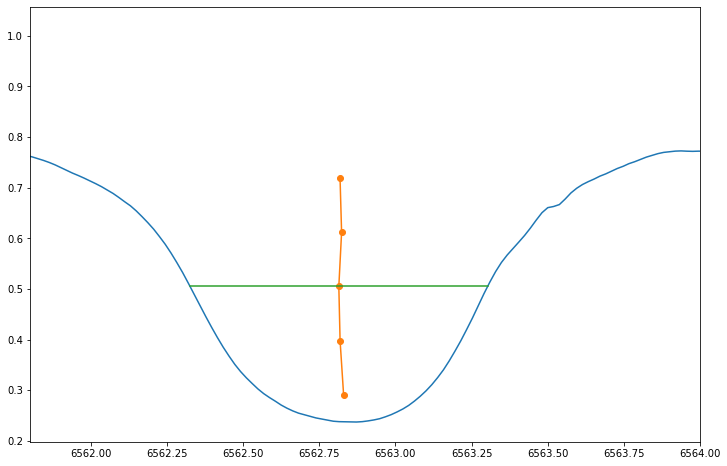

In [39]:
# Let's plot the bis. levels / positions for this test


plt.figure(figsize=[12,8])
plt.plot(ll_halpha,cube_halpha[125,10])
plt.xlim([6561.8,6564.])

plt.plot(bis,I_bis,'-o')
plt.plot([blue_position[2],red_position[2]],[I_level[2],I_level[2]])

In [43]:
# Now let's do the whole map !

bisectors = np.zeros([150,256,5])
wid = np.zeros([150,256])
off=1.1
levels = np.asarray([0.9,0.7,0.5,0.3,0.1])

for i in range(0,150):
    for j in range(0,256):
        (blue_position, red_position, I_level, line_core) = calc_bisectors(cube_halpha[i,j,:],ll_halpha,levels,off)
        bisectors[i,j,:] = (blue_position + red_position)*.5
        wid[i,j] = (red_position[2]- blue_position[2]) 
        

In [44]:
#  Note that we are not saving the intensities of the bisectors; could be done - another
# (150,256,5) array

In [45]:
# Translate bisectors to velocities:
bisector_velocities = (bisectors-ll0)/ll0 * 2.997E5

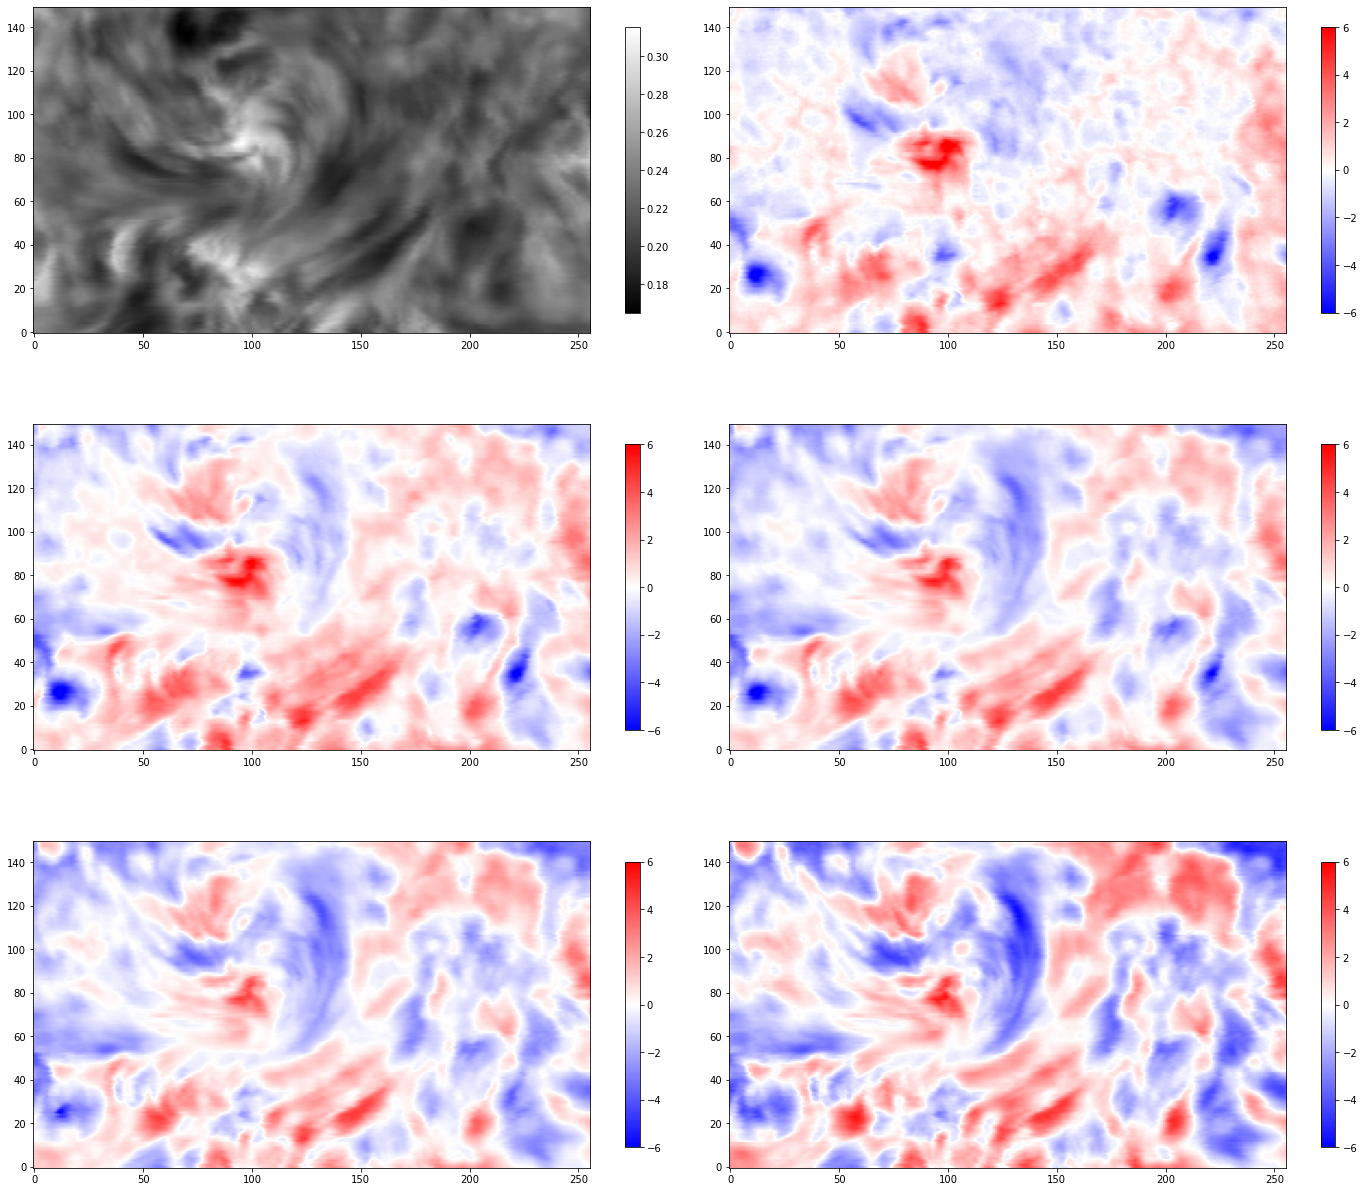

In [46]:
plt.figure(figsize=[20,18])
plt.subplot(321)
plt.imshow(cube_halpha[:,:,263],cmap='gray',origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(322)
plt.imshow(bisector_velocities[:,:,0],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(323)
plt.imshow(bisector_velocities[:,:,1],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(324)
plt.imshow(bisector_velocities[:,:,2],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(325)
plt.imshow(bisector_velocities[:,:,3],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(326)
plt.imshow(bisector_velocities[:,:,4],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.tight_layout()

In [42]:
# Discussion? to me, this says that the Halpha line is rarely (strongly) asymmetric ! i.e. those strangest
# velocity gradients shown on Day 1 are not here. Probably not very realistic...

### To finish this, let's investigate the width of the line! 

#### Do you have an idea why the width of the line might be important?

Text(0, 0.5, 'y [pix]')

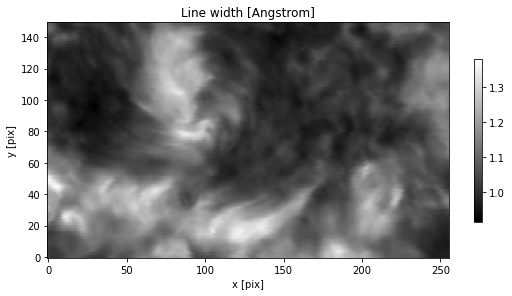

In [47]:
# We caculated it above; let's see what the width map looks like! Exciting!
plt.figure(figsize=[9,6])
plt.imshow(wid,cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Line width [Angstrom]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

Text(0, 0.5, 'y [pix]')

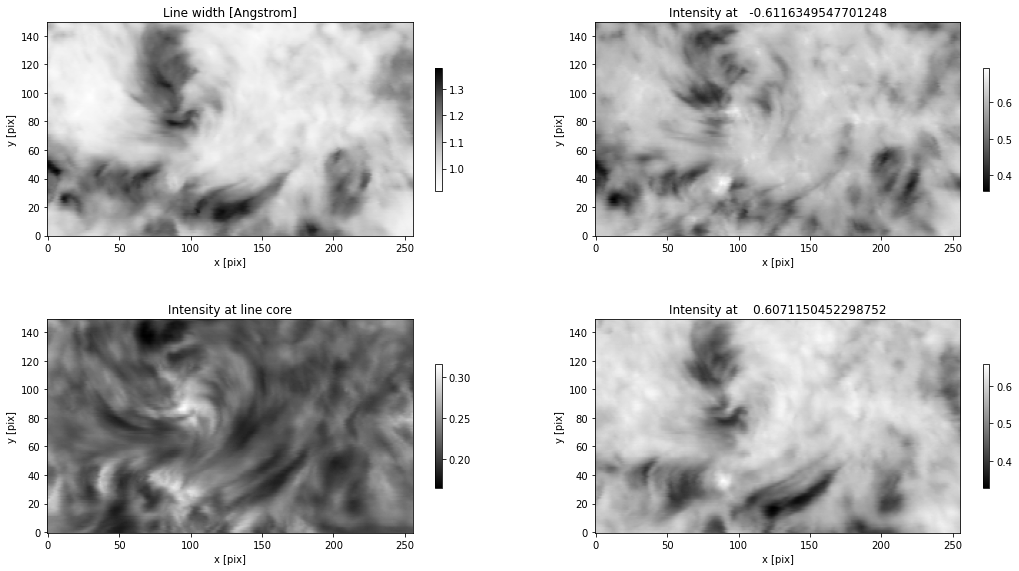

In [48]:
# Does the width have any relationship with other quantities? 


plt.figure(figsize=[18,10])
plt.subplot(221)
plt.imshow(wid,cmap='Greys',origin='lower')   # reverse intensity scale 
plt.colorbar(shrink=0.5) 
plt.title("Line width [Angstrom]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(222)
plt.imshow(cube_halpha[:,:,231],cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Intensity at   "+str(ll_halpha[231]-ll0))
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(223)
plt.imshow(cube_halpha[:,:,263],cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Intensity at line core")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(224)
plt.imshow(cube_halpha[:,:,295],cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Intensity at    "+str(ll_halpha[295]-ll0))
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

#### If you are interested in investigating the behaviour of specific pixels, you can use the module below, that allows you to point & click, to save the pixel coordinates. E.g., in this example, we want to investigate the dark features seen in the line wing (say. 0.8 Angstroms from the line core). That corresponds to our wavelength index 220

In [487]:
# This allows us to point & click to select pixels



%matplotlib notebook
import matplotlib.pyplot as plt 


<IPython.core.display.Javascript object>


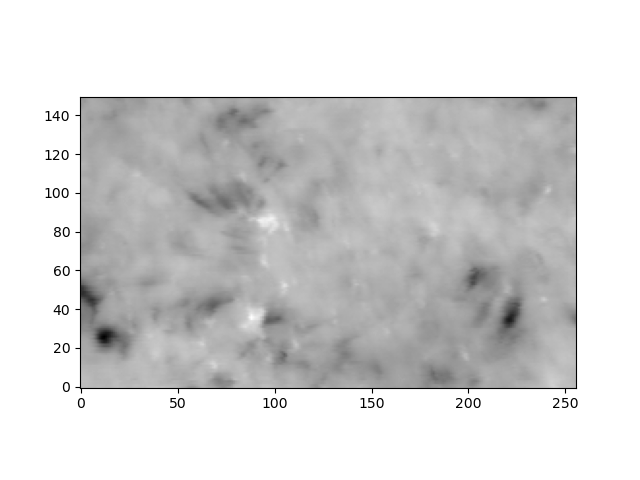

9

In [488]:
# Let's plot the image, wavelength by wavelength. Choose interesting indices from the plot above:
f,a = plt.subplots()
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
a.imshow(cube_halpha[:,:,220],cmap='gray',origin='lower')
f.canvas.mpl_connect('button_press_event', onclick)

In [489]:
print(pos)

[[150.81451612903226, 23.561290322580653]]


In [490]:
%matplotlib inline
import matplotlib.pyplot as plt 
# This is reverting back to the default plotting style

## Now let's repeat some of the steps above for Ca II 8542 and compare the inferred velocities! 



####  Find the line center position and measure some velocities afterwards! 

In [49]:
# Let's try on a random spectrum and see if it makes sense: 
l_center_ca = calc_line_center(mean_ca,ll_ca)
print (l_center_ca)
ll0_ca=l_center_ca

8542.09568157267


In [50]:
v_ca = np.zeros([150,250])


for i in range(0,150):
    for j in range(0,250):
        v_ca[i,j] = calc_line_center(cube_ca[i,j],ll_ca)

v_ca = (v_ca-ll0_ca)/ll0_ca*2.997E5

Text(0, 0.5, 'y [pix]')

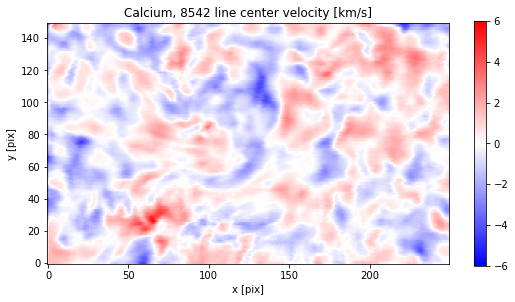

In [51]:
# Let's see an image !

plt.figure(figsize=[9,9])
plt.imshow(v_ca,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Calcium, 8542 line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

### Let's plot Halpha velocities and Ca II 8542 velocities side by side: 

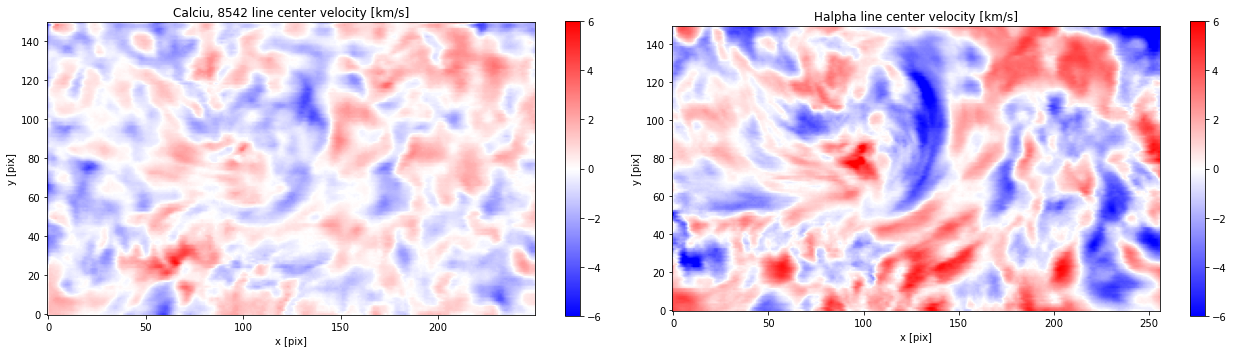

In [52]:
# 
plt.figure(figsize=[18,8.5])
plt.subplot(121)
plt.imshow(v_ca,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Calciu, 8542 line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(122)
plt.imshow(v_line_center,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Halpha line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.tight_layout()

#### Why are the core velocities so similar (in spatial structure) yet the CaII is systematically lower than Halpha's?  

## Next (final) task: Calculate bisector velocities for Ca II 8542. 

#### Since this line is more sensitive to the upper photosphere than Halpha, we expect to see a bit more here.

In [54]:
# Let's test, like Halpha before. However, the offset we have to use now is sensibly smaller
levels = np.asarray([0.9,0.7,0.5,0.3,0.1])
off_ca=0.6

(blue_position, red_position, I_level, line_core) = calc_bisectors(cube_ca[97,84],ll_ca,levels,off_ca) 
bis_ca = (blue_position + red_position)*.5
wid_ca = (red_position[2]- blue_position[2])   # at level =0.5

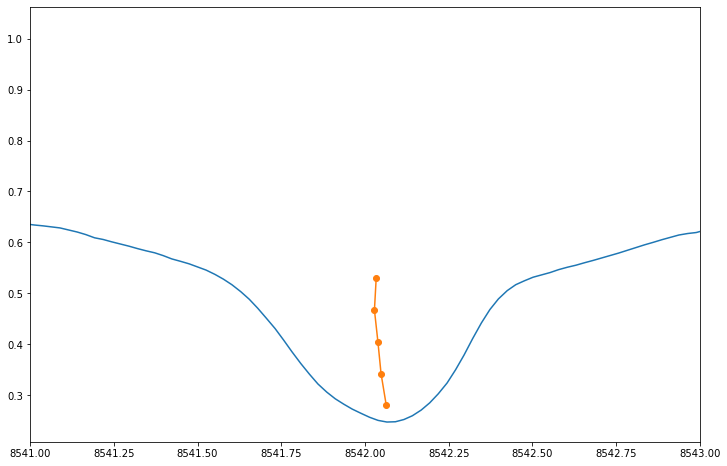

In [55]:
plt.figure(figsize=[12,8])
plt.plot(ll_ca,cube_ca[97,84])
plt.xlim([8541.,8543.])

plt.plot(bis_ca,I_level,'-o')

#### Less straight than Halpha's, but not out of this world. Let's do the whole map

In [61]:
bisectors_ca = np.zeros([150,250,5])
wid_ca= np.zeros([150,250])
off_ca = 0.6
levels = np.asarray([0.9,0.7,0.5,0.3,0.1])

for i in range(0,150):
    for j in range(0,250):
        (blue_position, red_position, I_level, line_core) = calc_bisectors(cube_ca[i,j,:],ll_ca,levels,off_ca) 
        bisectors_ca[i,j,:] = (blue_position + red_position)*.5
        wid_ca[i,j]  = (red_position[2]- blue_position[2])   # at level =0.5
        
#again we're not saving the intensities

In [62]:
bisector_velocities_ca = (bisectors_ca-ll0_ca)/ll0_ca * 2.997E5
bisector_velocities_ca.shape

(150, 250, 5)

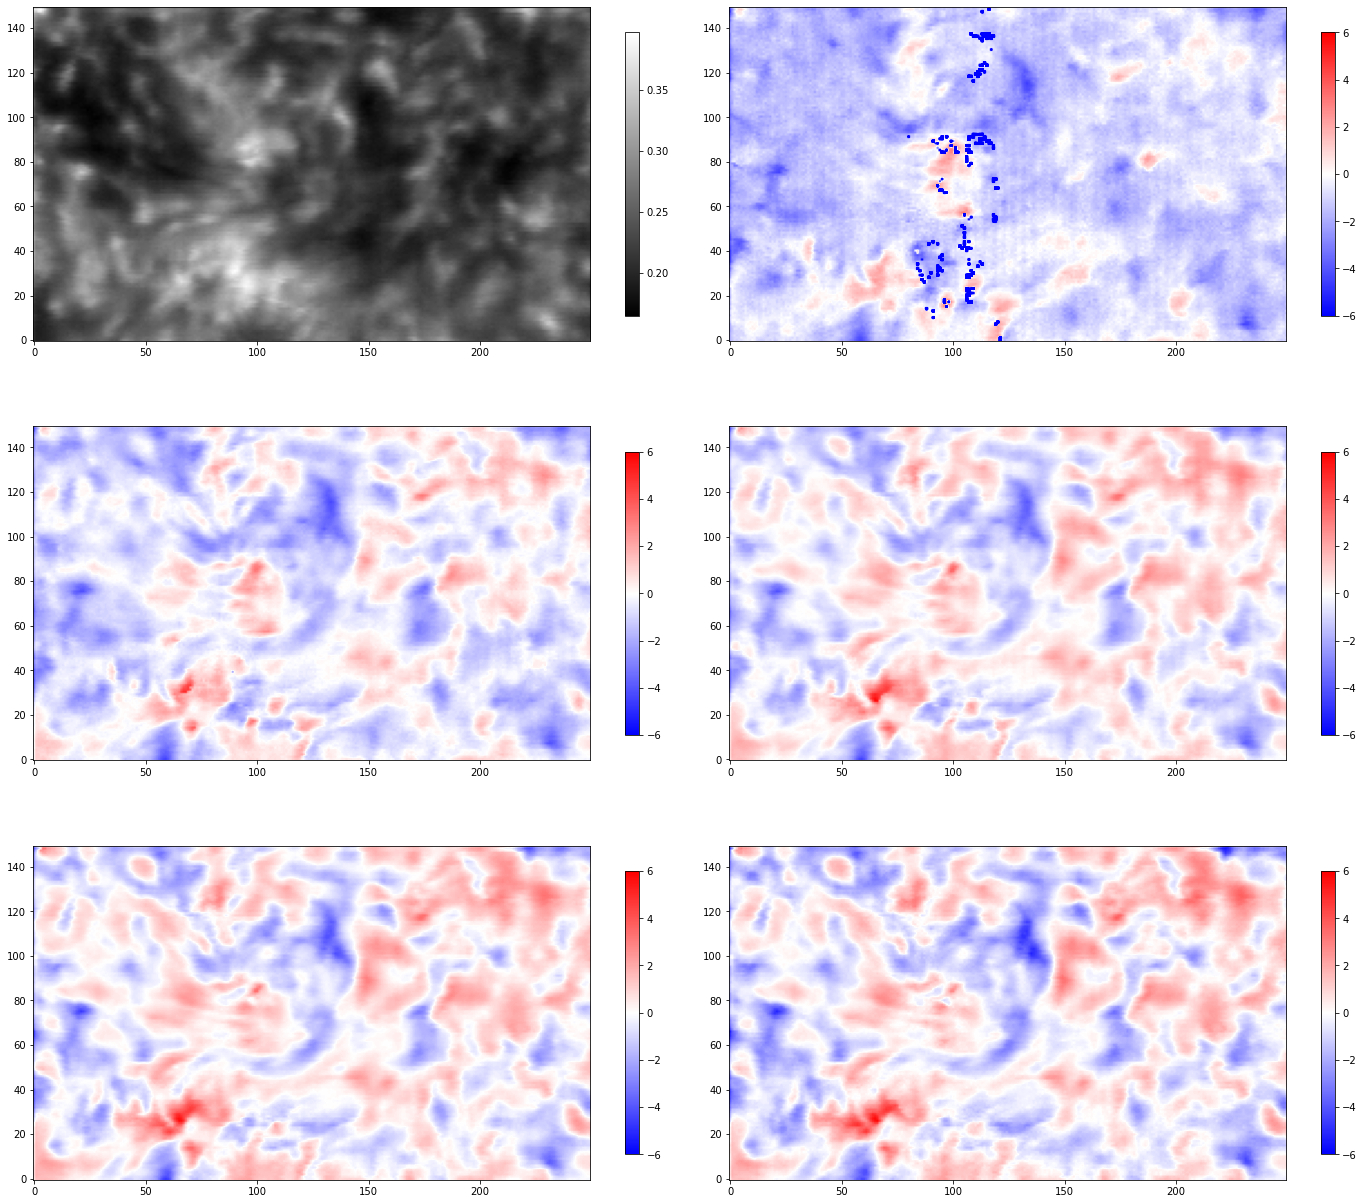

In [63]:
# Let's have a look at Ca 8542 velocities:
plt.figure(figsize=[20,18])
plt.subplot(321)
plt.imshow(cube_ca[:,:,280],cmap='gray',origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(322)
plt.imshow(bisector_velocities_ca[:,:,0],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(323)
plt.imshow(bisector_velocities_ca[:,:,1],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(324)
plt.imshow(bisector_velocities_ca[:,:,2],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(325)
plt.imshow(bisector_velocities_ca[:,:,3],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(326)
plt.imshow(bisector_velocities_ca[:,:,4],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.tight_layout()

#### The line is obviously asymmetric (bisector skewes blue in the upper parts of the core), but not too many pixels are out of the ordinary at first sight.


#### How about the width?

Text(0, 0.5, 'y [pix]')

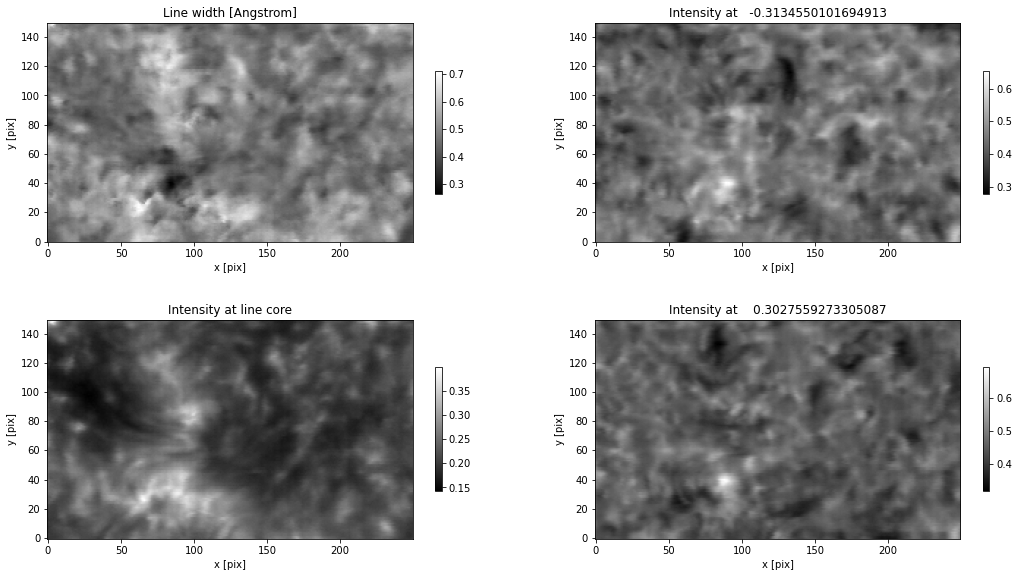

In [64]:
# Does the width have any relationship with other quantities? 


plt.figure(figsize=[18,10])
plt.subplot(221)
plt.imshow(wid_ca,cmap='gray',origin='lower')   # reverse intensity scale 
plt.colorbar(shrink=0.5) 
plt.title("Line width [Angstrom]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(222)
plt.imshow(cube_ca[:,:,265],cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Intensity at   "+str(ll_ca[265]-ll0_ca))
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(223)
plt.imshow(cube_ca[:,:,277],cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Intensity at line core")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(224)
plt.imshow(cube_ca[:,:,289],cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Intensity at    "+str(ll_ca[289]-ll0_ca))
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

The width bears a resemblance to the line core (this is much more visible in time-average), as the latter is related to magnetic elements: hotter -> broader line. Until it gets "too" hot, and then the line starts going into emission, and the widtth calculation looses validity.